<a href="https://colab.research.google.com/github/ZacharySoo01/I310D_FinalProject/blob/main/I310D_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Data Curation 

## Load the dataset file

In [ ]:
import pandas as pd 
import requests 
import numpy as np
#churn_data_df = pd.read_csv("/Telco_churn.csv")
churn_data_df = pd.read_excel("/content/Telco_churn.xlsx")
churn_data_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Data Analysis
We first wanted to understand types of values in the data (This will also later help us in cleaning the data)

In [ ]:
for names in churn_data_df.columns.tolist():
  unique = churn_data_df[names].unique()
  num_unique = churn_data_df[names].nunique()

  print(names +" Unique values:", unique) 
  print("Number of unique values:", num_unique)
  print()

CustomerID Unique values: ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Number of unique values: 7043

Count Unique values: [1]
Number of unique values: 1

Country Unique values: ['United States']
Number of unique values: 1

State Unique values: ['California']
Number of unique values: 1

City Unique values: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Number of unique values: 1129

Zip Code Unique values: [90003 90005 90006 ... 96128 96134 96146]
Number of unique values: 1652

Lat Long Unique values: ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Number of unique values: 1652

Latitude Unique values: [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
Number of unique values: 1652

Longitude Unique values: [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.2

##  Drop unusable columns
- Dropped CustomerID as it is just an identifier
- Dropped Count as all values were only "1"
- Dropped Location values like Country, State, Zip Code, Lat Long, Latitude, and Longitude as they concerned sensitive data
- Dropped Churn Label, Churn Score, CLTV, and Churn Reason, as to only focus on the label, Churn Value

In [ ]:
churn_data_df = churn_data_df.drop(["CustomerID","City","Count","Country","State","Zip Code", "Lat Long", "Latitude","Longitude"], axis = 1)
churn_data_df = churn_data_df.drop(["Churn Reason","CLTV","Churn Score","Churn Label"], axis = 1)

churn_data_df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


## Perform Duplication checks and remove them 

In [ ]:
# Check
number_of_duplicates = churn_data_df.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Drop dupes
churn_data_df = churn_data_df.drop_duplicates()

# Check again
number_of_duplicates = churn_data_df.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 22
 Number of duplicates after removing : 0


In [ ]:
churn_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7021 non-null   object 
 1   Senior Citizen     7021 non-null   object 
 2   Partner            7021 non-null   object 
 3   Dependents         7021 non-null   object 
 4   Tenure Months      7021 non-null   int64  
 5   Phone Service      7021 non-null   object 
 6   Multiple Lines     7021 non-null   object 
 7   Internet Service   7021 non-null   object 
 8   Online Security    7021 non-null   object 
 9   Online Backup      7021 non-null   object 
 10  Device Protection  7021 non-null   object 
 11  Tech Support       7021 non-null   object 
 12  Streaming TV       7021 non-null   object 
 13  Streaming Movies   7021 non-null   object 
 14  Contract           7021 non-null   object 
 15  Paperless Billing  7021 non-null   object 
 16  Payment Method     7021 

In [ ]:
churn_data_df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


## Transform Columns
Tranform the data so that the Binary Data columns are values of: 
- Yes --> 1
- No --> 0
- Other --> NaN/None

And that the other columns that do not contain binary data are one-hot encoded

In [ ]:
def transform(df):
    X = df[['Tenure Months','Monthly Charges','Total Charges','Churn Value']]
    groups = {
        'Male':1, 'Female':0
    }
    X['Gender'] = [groups.get(x) for x in df['Gender']]
    groups = {
        'Yes':1, 'No':0
    }
    X['Senior Citizen'] = [groups.get(x) for x in df['Senior Citizen']]
    groups = {
        'Yes':1, 'No':0
    }
    X['Partner'] = [groups.get(x) for x in df['Partner']]
    groups = {
        'Yes':1, 'No':0
    }
    X['Dependents'] = [groups.get(x) for x in df['Dependents']]
    groups = {
        'Yes':1, 'No':0
    }
    X['Phone Service'] = [groups.get(x) for x in df['Phone Service']]
    groups = {
        'Yes':1, 'No phone service': None, 'No':0
    }
    X['Multiple Lines'] = [groups.get(x) for x in df['Multiple Lines']]
    groups = {
        'Yes':1, 'No internet service': None, 'No':0
    }
    X['Online Security'] = [groups.get(x) for x in df['Online Security']]
    groups = {
        'Yes':1, 'No internet service': None, 'No':0
    }
    X['Online Backup'] = [groups.get(x) for x in df['Online Backup']]
    groups = {
        'Yes':1, 'No internet service': None, 'No':0
    }
    X['Device Protection'] = [groups.get(x) for x in df['Device Protection']]
    groups = {
        'Yes':1, 'No internet service': None, 'No':0
    }
    X['Tech Support'] = [groups.get(x) for x in df['Tech Support']]
    groups = {
        'Yes':1, 'No internet service': None, 'No':0
    }
    X['Streaming TV'] = [groups.get(x) for x in df['Streaming TV']]
    groups = {
        'Yes':1, 'No internet service': None, 'No':0
    }
    X['Streaming Movies'] = [groups.get(x) for x in df['Streaming Movies']]
    
    groups = {
        'Month-to-month':3, 'Two year': 2, 'One year':1
    }
    X['Contract'] = [groups.get(x) for x in df['Contract']]

    groups = {
        'Month-to-month':3, 'Two year': 2, 'One year':1
    }
    X['Contract'] = [groups.get(x) for x in df['Contract']]
    groups = {
        'Yes':1, 'No': 0
    }
    X['Paperless Billing'] = [groups.get(x) for x in df['Paperless Billing']]

    groups = {
        'Mailed check':1, 'Electronic check': 2, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4
    }
    X['Payment Method'] = [groups.get(x) for x in df['Payment Method']]

    groups = {
        'No': 0, 'DSL':1, 'Fiber optic': 2, 'Cable': 3
    }
    X['Internet Service'] = [groups.get(x) for x in df['Internet Service']]

    return X

churn_data_df = transform(churn_data_df)
churn_data_df

<ipython-input-7-1891eae65eee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = [groups.get(x) for x in df['Gender']]
<ipython-input-7-1891eae65eee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Senior Citizen'] = [groups.get(x) for x in df['Senior Citizen']]
<ipython-input-7-1891eae65eee>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Internet Service
0,2,53.85,108.15,1,1,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3,1,1,1
1,2,70.70,151.65,1,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,2,2
2,8,99.65,820.5,1,0,0,0,1,1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3,1,2,2
3,28,104.80,3046.05,1,0,0,1,1,1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3,1,2,2
4,49,103.70,5036.3,1,1,0,0,1,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,3,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.4,0,0,0,0,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,3,0
7039,24,84.80,1990.5,0,1,0,1,1,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,1,1,1
7040,72,103.20,7362.9,0,0,0,1,1,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,1,4,2
7041,11,29.60,346.45,0,0,0,1,1,0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,3,1,2,1


## Drop Null values

In [ ]:
# Drop null
churn_data_df = churn_data_df.dropna()

# Check again
churn_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4827 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tenure Months      4827 non-null   int64  
 1   Monthly Charges    4827 non-null   float64
 2   Total Charges      4827 non-null   object 
 3   Churn Value        4827 non-null   int64  
 4   Gender             4827 non-null   int64  
 5   Senior Citizen     4827 non-null   int64  
 6   Partner            4827 non-null   int64  
 7   Dependents         4827 non-null   int64  
 8   Phone Service      4827 non-null   int64  
 9   Multiple Lines     4827 non-null   float64
 10  Online Security    4827 non-null   float64
 11  Online Backup      4827 non-null   float64
 12  Device Protection  4827 non-null   float64
 13  Tech Support       4827 non-null   float64
 14  Streaming TV       4827 non-null   float64
 15  Streaming Movies   4827 non-null   float64
 16  Contract           4827 

In [ ]:
churn_data_df

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Internet Service
0,2,53.85,108.15,1,1,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3,1,1,1
1,2,70.70,151.65,1,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,2,2
2,8,99.65,820.5,1,0,0,0,1,1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3,1,2,2
3,28,104.80,3046.05,1,0,0,1,1,1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3,1,2,2
4,49,103.70,5036.3,1,1,0,0,1,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,3,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,38,69.50,2625.25,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,4,2
7036,19,78.70,1495.1,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,3,2
7039,24,84.80,1990.5,0,1,0,1,1,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,1,1,1
7040,72,103.20,7362.9,0,0,0,1,1,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,1,4,2


## Convert floats in columns to int

In [ ]:
def convert_float_to_int(f):
    converted = int(f)
    return converted

def convert_obj_to_float(f):
  if f == " " or f == "Yes":
    return None
  else:
    return float(f)

churn_data_df["Multiple Lines"] = churn_data_df["Multiple Lines"].apply(convert_float_to_int)
churn_data_df["Online Security"] = churn_data_df["Online Security"].apply(convert_float_to_int)
churn_data_df["Online Backup"] = churn_data_df["Online Backup"].apply(convert_float_to_int)
churn_data_df["Device Protection"] = churn_data_df["Device Protection"].apply(convert_float_to_int)
churn_data_df["Tech Support"] = churn_data_df["Tech Support"].apply(convert_float_to_int)
churn_data_df["Streaming TV"] = churn_data_df["Streaming TV"].apply(convert_float_to_int)
churn_data_df["Streaming Movies"] = churn_data_df["Streaming Movies"].apply(convert_float_to_int)
churn_data_df["Contract"] = churn_data_df["Contract"].apply(convert_float_to_int)
churn_data_df["Paperless Billing"] = churn_data_df["Paperless Billing"].apply(convert_float_to_int)
churn_data_df["Payment Method"] = churn_data_df["Payment Method"].apply(convert_float_to_int)
churn_data_df["Churn Value"] = churn_data_df["Churn Value"].apply(convert_float_to_int)
churn_data_df["Tenure Months"] = churn_data_df["Tenure Months"].apply(convert_float_to_int)
churn_data_df["Gender"] = churn_data_df["Gender"].apply(convert_float_to_int)
churn_data_df["Senior Citizen"] = churn_data_df["Senior Citizen"].apply(convert_float_to_int)
churn_data_df["Internet Service"] = churn_data_df["Internet Service"].apply(convert_float_to_int)
churn_data_df["Total Charges"] = churn_data_df["Total Charges"].apply(convert_obj_to_float)

churn_data_df

<ipython-input-10-e7847decc354>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data_df["Multiple Lines"] = churn_data_df["Multiple Lines"].apply(convert_float_to_int)
<ipython-input-10-e7847decc354>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data_df["Online Security"] = churn_data_df["Online Security"].apply(convert_float_to_int)
<ipython-input-10-e7847decc354>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Internet Service
0,2,53.85,108.15,1,1,0,0,0,1,0,1,1,0,0,0,0,3,1,1,1
1,2,70.70,151.65,1,0,0,0,1,1,0,0,0,0,0,0,0,3,1,2,2
2,8,99.65,820.50,1,0,0,0,1,1,1,0,0,1,0,1,1,3,1,2,2
3,28,104.80,3046.05,1,0,0,1,1,1,1,0,0,1,1,1,1,3,1,2,2
4,49,103.70,5036.30,1,1,0,0,1,1,1,0,1,1,0,1,1,3,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,38,69.50,2625.25,0,1,0,0,0,1,0,0,0,0,0,0,0,3,1,4,2
7036,19,78.70,1495.10,0,1,0,0,0,1,0,0,0,0,0,1,0,3,1,3,2
7039,24,84.80,1990.50,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1
7040,72,103.20,7362.90,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,4,2


## Sanity check for duplicates and drop null values

In [ ]:
# Check
number_of_duplicates = churn_data_df.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Drop dupes
churn_data_df = churn_data_df.drop_duplicates()

# Check again
number_of_duplicates = churn_data_df.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


In [ ]:
# Check
churn_data_df.info()

# Drop null
churn_data_df = churn_data_df.dropna()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4827 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tenure Months      4827 non-null   int64  
 1   Monthly Charges    4827 non-null   float64
 2   Total Charges      4824 non-null   float64
 3   Churn Value        4827 non-null   int64  
 4   Gender             4827 non-null   int64  
 5   Senior Citizen     4827 non-null   int64  
 6   Partner            4827 non-null   int64  
 7   Dependents         4827 non-null   int64  
 8   Phone Service      4827 non-null   int64  
 9   Multiple Lines     4827 non-null   int64  
 10  Online Security    4827 non-null   int64  
 11  Online Backup      4827 non-null   int64  
 12  Device Protection  4827 non-null   int64  
 13  Tech Support       4827 non-null   int64  
 14  Streaming TV       4827 non-null   int64  
 15  Streaming Movies   4827 non-null   int64  
 16  Contract           4827 

In [ ]:
# Check again
churn_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4824 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tenure Months      4824 non-null   int64  
 1   Monthly Charges    4824 non-null   float64
 2   Total Charges      4824 non-null   float64
 3   Churn Value        4824 non-null   int64  
 4   Gender             4824 non-null   int64  
 5   Senior Citizen     4824 non-null   int64  
 6   Partner            4824 non-null   int64  
 7   Dependents         4824 non-null   int64  
 8   Phone Service      4824 non-null   int64  
 9   Multiple Lines     4824 non-null   int64  
 10  Online Security    4824 non-null   int64  
 11  Online Backup      4824 non-null   int64  
 12  Device Protection  4824 non-null   int64  
 13  Tech Support       4824 non-null   int64  
 14  Streaming TV       4824 non-null   int64  
 15  Streaming Movies   4824 non-null   int64  
 16  Contract           4824 

## Feature Analysis
We decided to use bivariate analysis to determine what features should be used in the model. We did this by comparing each column (feature) with the label (Churn Value) with the Linear Regression Test for Significance.
- Linear Regression Test for Significance: If the p-value of the association between the feature and label is lower than alpha value of 0.05, there is a significant relationship (assocation) between the feature and label

Association between Tenure Months and Churn Value(p-value): 1.3410653913426676e-201
Association between Total Charges and Churn Value(p-value): 3.8813637546260397e-146
Association between Senior Citizen and Churn Value(p-value): 7.321210768988156e-14
Association between Partner and Churn Value(p-value): 2.5419991729222584e-32
Association between Dependents and Churn Value(p-value): 3.161290960028799e-102


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
<ipython-input-14-34f83e826665>:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(churned, not_churned, equal_var=False)


Association between Online Security and Churn Value(p-value): 5.683657031290356e-102
Association between Online Backup and Churn Value(p-value): 4.4955658740716785e-48
Association between Device Protection and Churn Value(p-value): 1.0941603664680183e-35
Association between Tech Support and Churn Value(p-value): 1.340796762361215e-93
Association between Streaming TV and Churn Value(p-value): 0.010632086966700538
Association between Streaming Movies and Churn Value(p-value): 0.002203553241381093
Association between Contract and Churn Value(p-value): 2.400090705069821e-149
Association between Paperless Billing and Churn Value(p-value): 9.243486258482429e-24
Association between Payment Method and Churn Value(p-value): 3.6079355904664377e-35
Association between Internet Service and Churn Value(p-value): 1.7594482896343278e-86

Excluded features (p-value > 0.05): ['Monthly Charges', 'Gender', 'Phone Service', 'Multiple Lines']


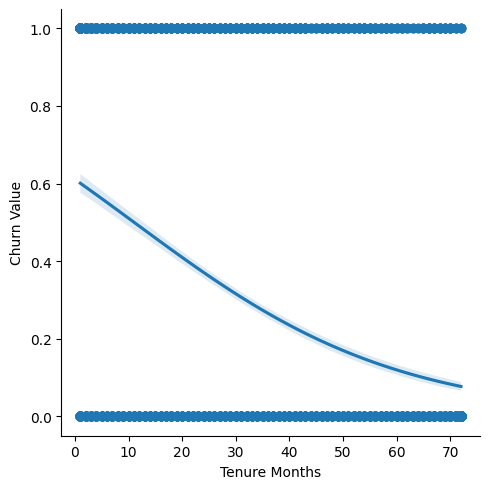

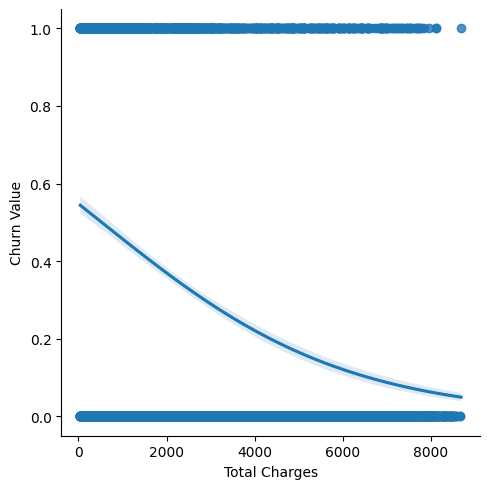

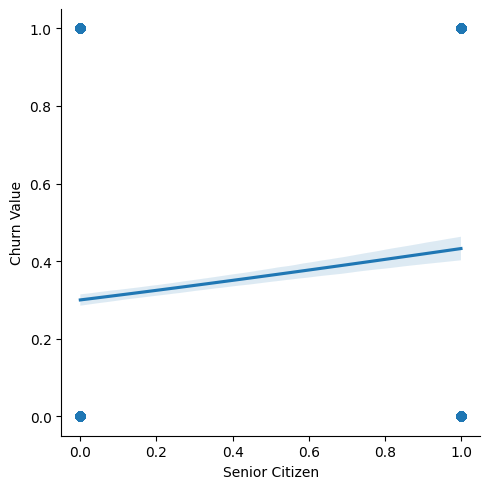

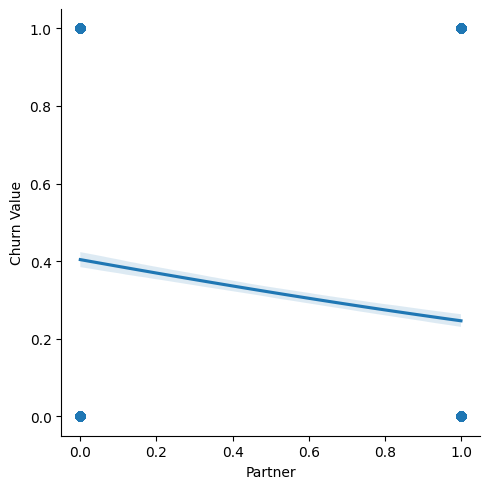

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import seaborn as sns

unadded_features = []
for name in churn_data_df.columns.tolist():
  if name == "Churn Value":
    continue
 # calculate correlation coefficient
  correlation, p_value = pearsonr(churn_data_df[name], churn_data_df['Churn Value'])
  # perform t-test
  churned = churn_data_df[churn_data_df['Churn Value'] == 1][name]
  not_churned = churn_data_df[churn_data_df['Churn Value'] == 0][name] 
  t_stat, p_value = ttest_ind(churned, not_churned, equal_var=False)
  if p_value < 0.05: 
    # Print the p value
    print("Association between " + name + " and Churn Value(p-value):", p_value)
    # Display scatterplot
    sns.lmplot(x=name, y='Churn Value', data=churn_data_df, logistic=True)
  else:
    unadded_features.append(name)
print()
print("Excluded features (p-value > 0.05):", unadded_features)

## Drop excluded features from dataset
This means that the areas that are most important to look at are Tenure Months, Total Charges, Senior Citizen, Partner, Dependents, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Paperless Billing, Payment Method, and Internet Service.

In [ ]:
churn_data_df = churn_data_df.drop(["Monthly Charges", "Gender", "Phone Service", "Multiple Lines"], axis=1)

## Split the Dataset into Test and Training Data for ML Classifier model

In [ ]:
from sklearn.model_selection import train_test_split
x = churn_data_df.drop('Churn Value', axis=1)
y = churn_data_df["Churn Value"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train.info()

In [ ]:
X_test.info()
X_test.head()

In [ ]:
y_train.info()

In [ ]:
y_test.info()

## Save dataframes to csv files

In [ ]:
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

# Part II: ML Logistic Classifier model and Accuracy, Precision, Recall, and F1 scores
Use the test and training datasets to create and assess the model.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

trainX_df = pd.read_csv("X_train.csv")

train_features = trainX_df[["Tenure Months","Total Charges", "Senior Citizen",
                          "Partner", "Dependents", "Online Security", 
                           "Online Backup","Device Protection","Tech Support","Streaming TV", "Streaming Movies", "Contract", "Paperless Billing", "Payment Method", "Internet Service"
                          ]]

trainY_df = pd.read_csv("y_train.csv")
train_labels = trainY_df["Churn Value"]
lr_classifier = LogisticRegression(solver='lbfgs',max_iter=10000)
lr_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())
print("...Training successfully accomplished...")

test_inputs = pd.read_csv("X_test.csv")

test_inputs= test_inputs[["Tenure Months","Total Charges", "Senior Citizen",
                          "Partner", "Dependents", "Online Security", 
                           "Online Backup","Device Protection","Tech Support","Streaming TV", "Streaming Movies", "Contract", "Paperless Billing", "Payment Method", "Internet Service", 
                          ]]                          
                          
test_outputs = pd.read_csv("y_test.csv")
test_outputs = test_outputs["Churn Value"]
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,test_outputs)
lr_precision = precision_score(y_predicted_lr,test_outputs)
lr_recall = recall_score(y_predicted_lr,test_outputs)
lr_f1score = f1_score(y_predicted_lr,test_outputs)
print(f"Accuracy of the Logistic Classifier on test data= {lr_accuracy_score}")
print(f"Precision of the Logistic Classifier on test data= {lr_precision}")
print(f"Recall of the Logistic Classifier on test data= {lr_recall}")
print(f"F1 Score of the Logistic Classifier on test data= {lr_f1score}")

# Part III: Evaluation of our ML model



## Confusion Matrix of the Model

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

y_test_predictions = lr_classifier.predict(train_features)
conf_matrix = confusion_matrix(y_test, y_predicted_lr)
conf_matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix,
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='flag', 
    vmax=175 
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.text(.425, 0.3, 'TN', fontsize = 23, color="white", weight = 'bold')
plt.text(1.435, 0.3, 'FP', fontsize = 23, color="white", weight = 'bold')
plt.text(.425, 1.3, 'FN', fontsize = 23, color="white", weight = 'bold')
plt.text(1.435, 1.3, 'TP', fontsize = 23, color="white", weight = 'bold')



plt.title("Confusion Matrix")
plt.show()

## AUC-ROC of our model

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_predicted_lr)

print (f"AUC of the Logistic Classifier on test data= {auc}")

fpr, tpr, _ = metrics.roc_curve(y_test,  y_predicted_lr)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## LIME Explanability

In [ ]:
%pip install lime 

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=train_features.to_numpy(),
    feature_names=train_features.columns,
    class_names=[0, 1],
    mode='classification'
)

In [ ]:
input_data = X_test.sample().to_numpy()
exp = explainer.explain_instance(data_row=input_data[0], predict_fn=lr_classifier.predict_proba,  num_features=15)

y_predicted_lr = lr_classifier.predict(input_data)
score = lr_classifier.predict_proba(input_data)

if y_predicted_lr[0]==1:
    print (f"The person is likely to churn in the near future (classifier confidence = {score[0][1]})")
    
if y_predicted_lr[0]==0:
    print (f"The person will not churn (classifier confidence = {score[0][0]})")

exp.show_in_notebook(show_table=True)